In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b



In [2]:
df = pd.read_excel('../adsorption.xlsx')


In [3]:
G_Cl = list()
Cl_site = list()
η_CER = list()

tolist = df.values.tolist()
for i in range(len(tolist)) :
    if tolist[i][3] < tolist[i][4] or np.isnan(tolist[i][4]) :
        G_Cl.append(tolist[i][3])
        Cl_site.append('t')
    elif tolist[i][3] > tolist[i][4] or np.isnan(tolist[i][3]) :
        G_Cl.append(tolist[i][4])
        Cl_site.append('b')



In [4]:
df['η_CER_t'] = np.abs(df['G_Cl_t']-1.36)
df['η_CER_b'] = np.abs(df['G_Cl_b']-1.36)
df['G_Cl'] = G_Cl
df['Cl_site'] =Cl_site
df['η_CER'] = np.abs(df['G_Cl']-1.36)


In [5]:
df

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b,η_CER_t,η_CER_b,G_Cl,Cl_site,η_CER
0,p5,4,Mn,0.80,NaN,1.64,NaN,0.89,NaN,3.86,NaN,0.56,NaN,0.80,t,0.56
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.97,NaN,3.78,NaN,0.50,NaN,0.86,t,0.50
2,p5,4,Co,1.15,NaN,2.77,NaN,1.36,NaN,4.09,NaN,0.21,NaN,1.15,t,0.21
3,p5,4,Ni,1.83,NaN,4.05,NaN,2.23,NaN,4.81,NaN,0.47,NaN,1.83,t,0.47
4,p5,4,Cu,1.90,NaN,4.50,NaN,2.33,NaN,4.86,NaN,0.54,NaN,1.90,t,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,p5,0,Ag,1.93,1.44,4.92,1.34,2.61,1.20,4.98,233.19,0.57,0.08,1.44,b,0.08
68,p5,0,Ir,0.00,NaN,0.49,0.42,0.24,0.53,3.10,NaN,1.36,NaN,0.00,t,1.36
69,p5,0,Pt,1.47,NaN,3.43,1.24,1.96,1.61,4.80,4.28,0.11,NaN,1.47,t,0.11
70,p5,0,Au,1.97,1.57,4.96,1.78,2.63,1.32,5.00,4.07,0.61,0.21,1.57,b,0.21


In [6]:
Gcl = df.loc[df['M'] == 'Fe','G_Cl']
Gcl

1     0.86
13    0.77
25    0.77
37    0.57
49    0.65
61    0.62
Name: G_Cl, dtype: float64

In [7]:
def volcano_all(TM) :
    plt.figure(1,figsize=(15,10))
    ax = plt.subplot(111)

    x = []
    y = []

    x_fit = np.arange(0,1.36*2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,c='black',linewidth=2,alpha=0.5) 
    
    c = ['#ff124f','#fe75fe','#44D7BE','#00b3fe','#7a04eb','#120458']
    l = [TM+'N$_4$C',TM+'N$_3$C',TM+'N$_2$C',TM+'N$_2$C-trans',TM+'N$_1$C',TM+'N$_0$C']
    j = 0
    
    Gcl_b = list(df.loc[df['M']== TM, 'G_Cl_b'])
    η_CER_b = list(df.loc[df['M']== TM, 'η_CER_b'])
    Gcl_t = list(df.loc[df['M']== TM, 'G_Cl_t'])
    η_CER_t = list(df.loc[df['M']== TM, 'η_CER_t'])
    
    for i in range(len(Gcl_b)) :
        if np.isnan(Gcl_t[i]) ==False :
            plt.scatter(Gcl_t[i],-η_CER_t[i],color=c[i],s=300,label=l[i],marker='o',alpha=0.5)
            
        if np.isnan(Gcl_b[i]) == False :
            plt.scatter(Gcl_b[i],-η_CER_b[i],color=c[i],s=300,label=l[i],marker='^',alpha=0.5)

            
    
    
    ax.legend(fontsize=15)
        
    plt.xlabel('ΔG$_{Cl} / eV$',fontsize=20)
    plt.ylabel('-η$_{CER} / V$',fontsize=20)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.show()




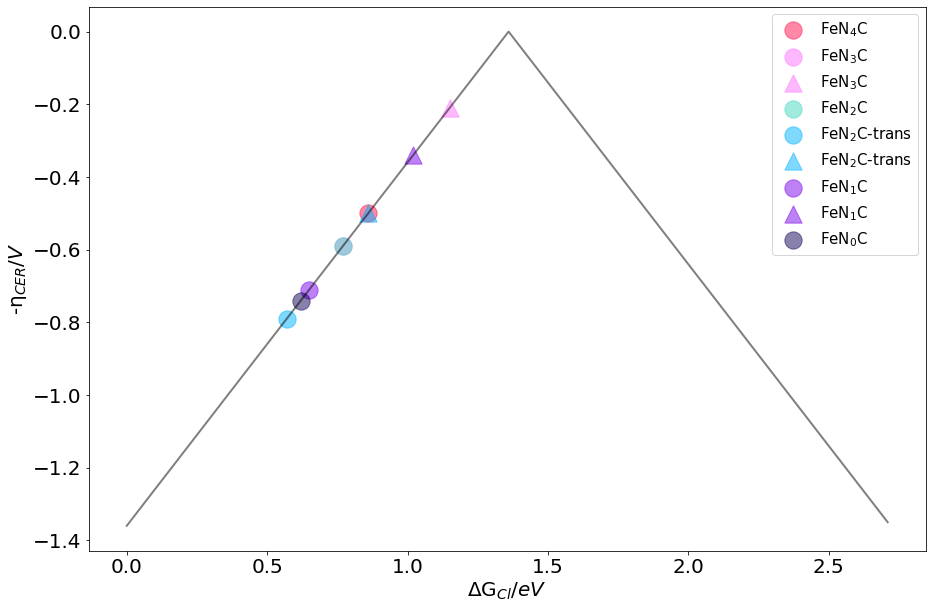

In [8]:
volcano_all('Fe')

In [9]:
df.loc[df['M']== 'Fe']

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b,η_CER_t,η_CER_b,G_Cl,Cl_site,η_CER
1,p5,4,Fe,0.86,NaN,1.77,NaN,0.97,NaN,3.78,NaN,0.50,NaN,0.86,t,0.50
13,p5,3,Fe,0.77,1.15,1.65,0.60,0.79,0.86,3.73,NaN,0.59,0.21,0.77,t,0.59
25,p5,2,Fe,0.77,NaN,1.67,0.67,0.80,0.95,3.86,NaN,0.59,NaN,0.77,t,0.59
37,p5,2-t,Fe,0.57,0.86,1.30,0.29,0.74,0.60,3.72,NaN,0.79,0.50,0.57,t,0.79
49,p5,1,Fe,0.65,1.02,1.39,0.35,0.80,0.76,3.81,NaN,0.71,0.34,0.65,t,0.71
61,p5,0,Fe,0.62,NaN,1.13,0.41,0.83,0.93,3.83,NaN,0.74,NaN,0.62,t,0.74


In [10]:
df.loc[df['M']== 'Ag']

,s,#of N,M,G_Cl_t,G_Cl_b,G_O_t,G_O_b,G_OH_t,G_OH_b,G_OOH_t,G_OOH_b,η_CER_t,η_CER_b,G_Cl,Cl_site,η_CER
7,p5,4,Ag,2.06,NaN,4.97,NaN,2.71,NaN,4.92,NaN,0.70,NaN,2.06,t,0.70
19,p5,3,Ag,4.87,1.06,4.87,1.31,NaN,0.55,4.90,3.57,3.51,0.30,1.06,b,0.30
31,p5,2,Ag,2.03,1.50,4.85,1.95,2.62,1.08,4.96,4.00,0.67,0.14,1.50,b,0.14
43,p5,2-t,Ag,1.80,1.19,4.69,1.34,2.48,0.85,4.92,3.92,0.44,0.17,1.19,b,0.17
55,p5,1,Ag,1.85,1.25,4.71,1.36,2.49,0.96,4.95,4.02,0.49,0.11,1.25,b,0.11
67,p5,0,Ag,1.93,1.44,4.92,1.34,2.61,1.20,4.98,233.19,0.57,0.08,1.44,b,0.08


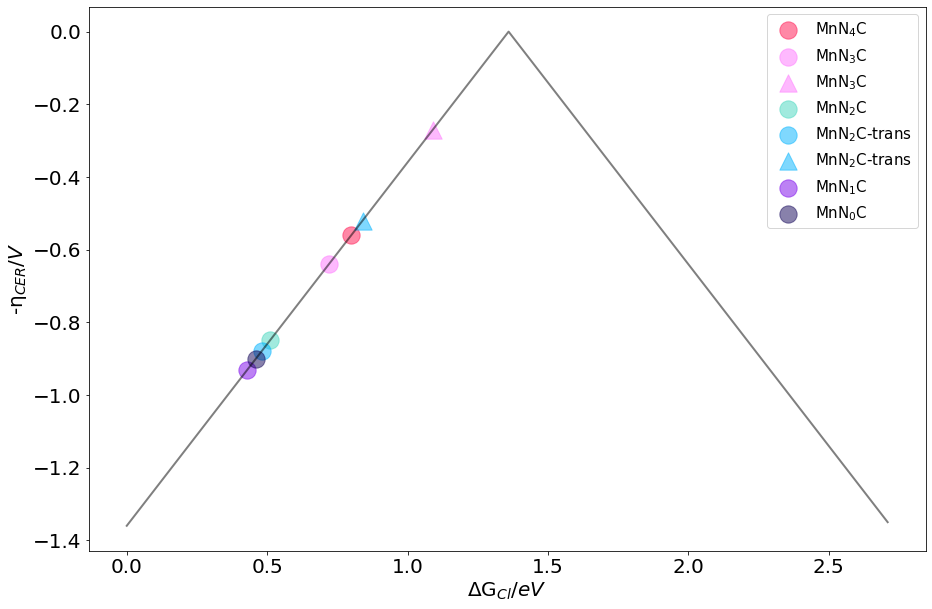

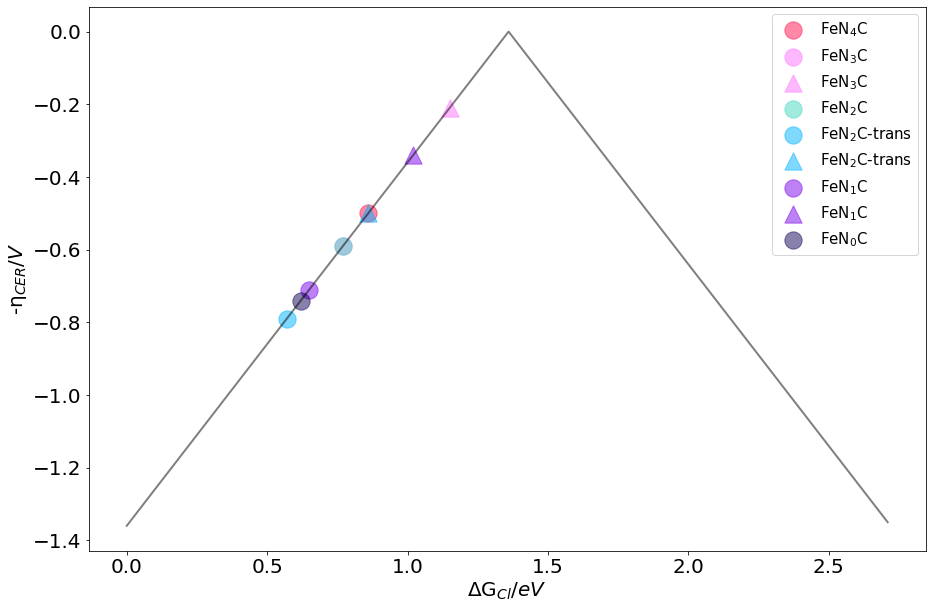

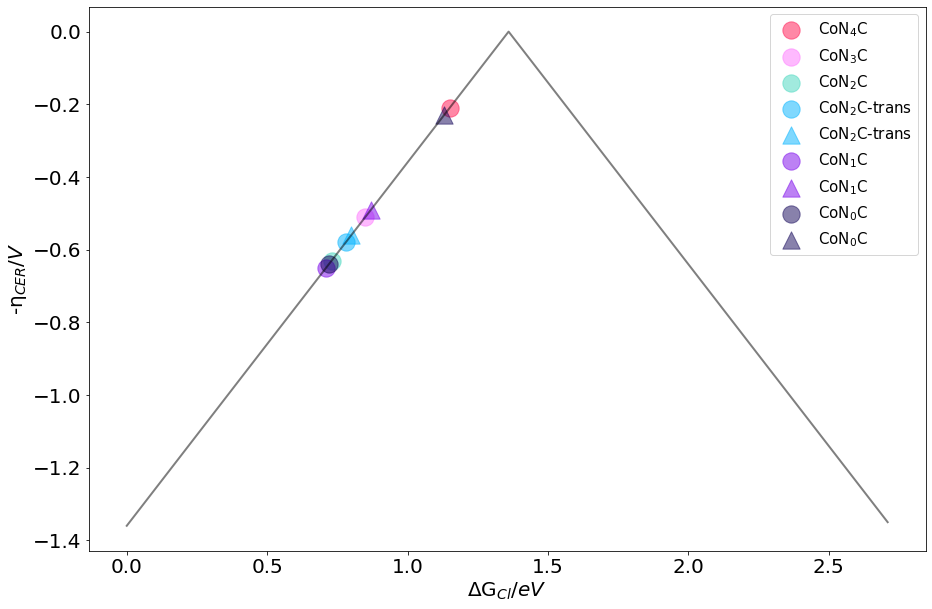

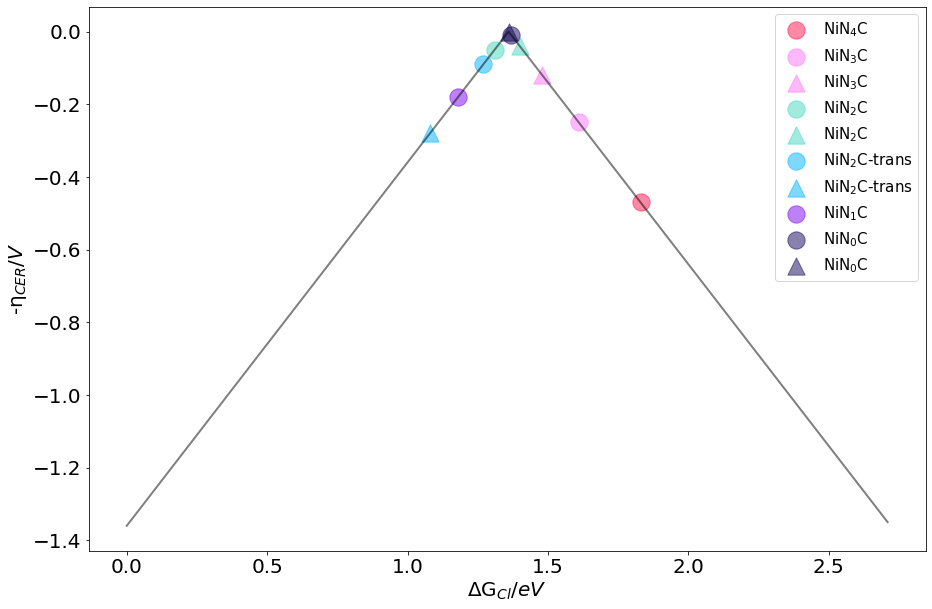

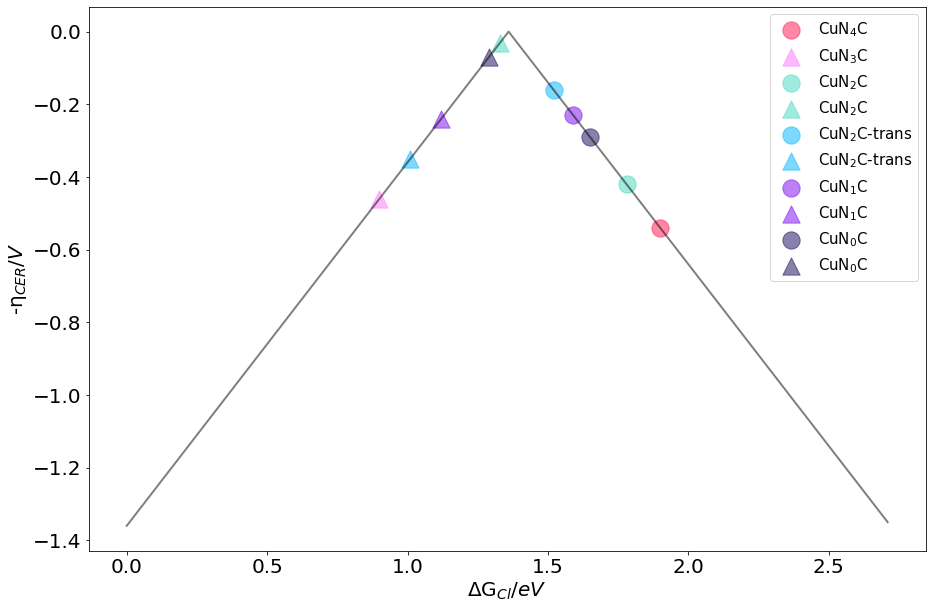

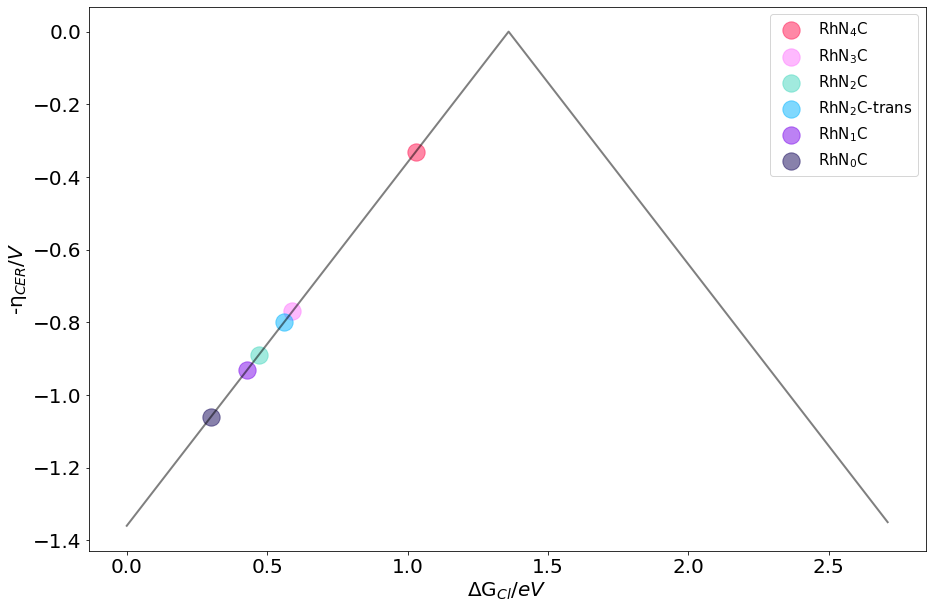

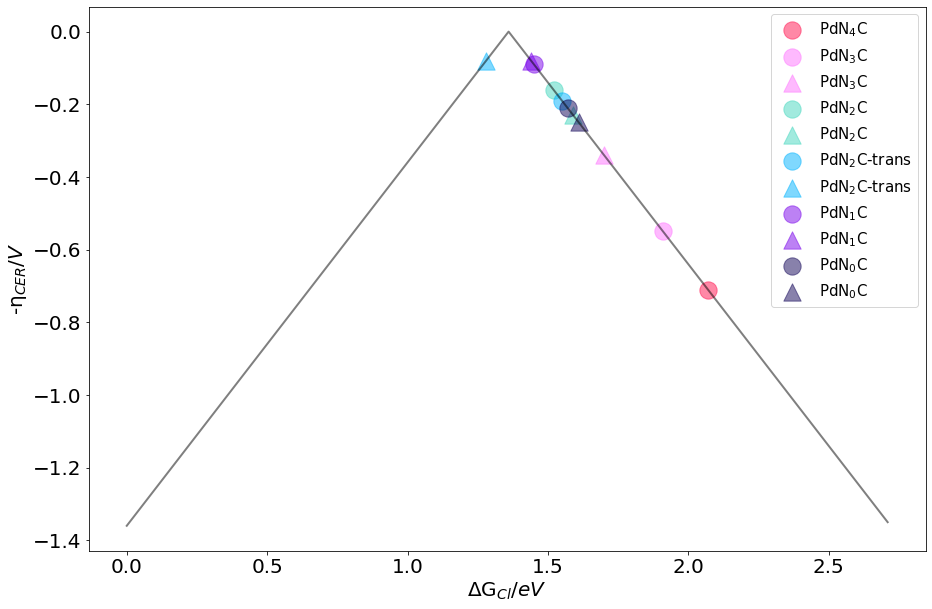

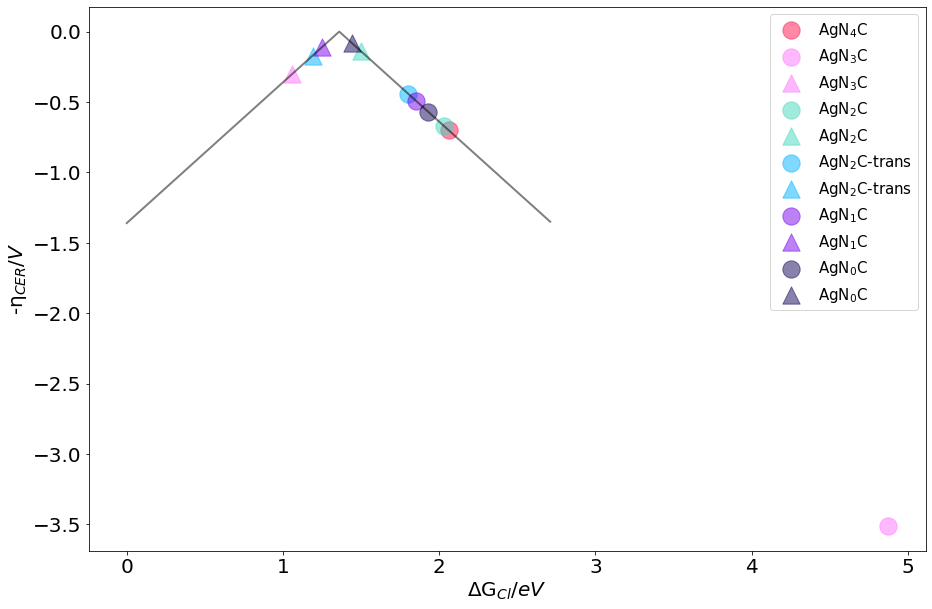

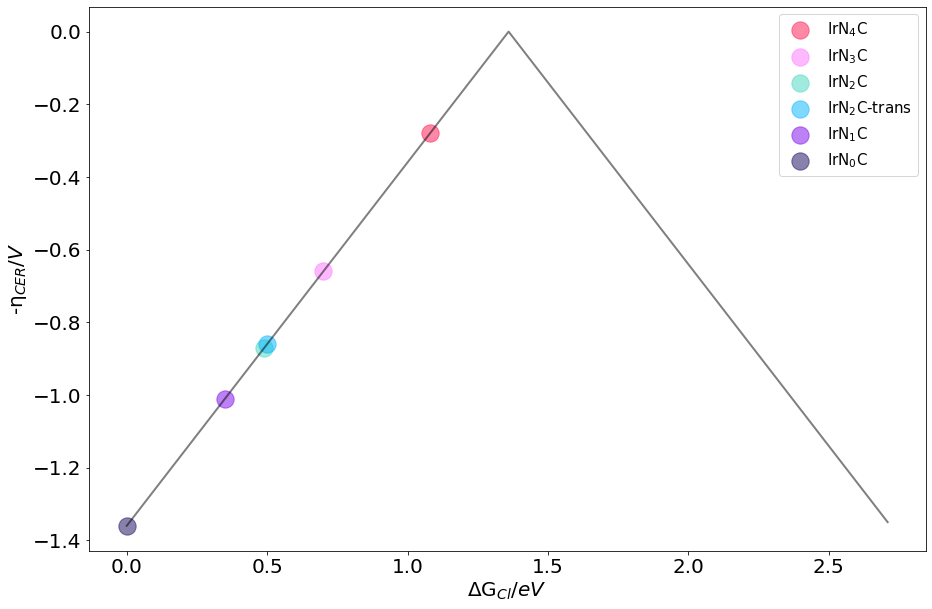

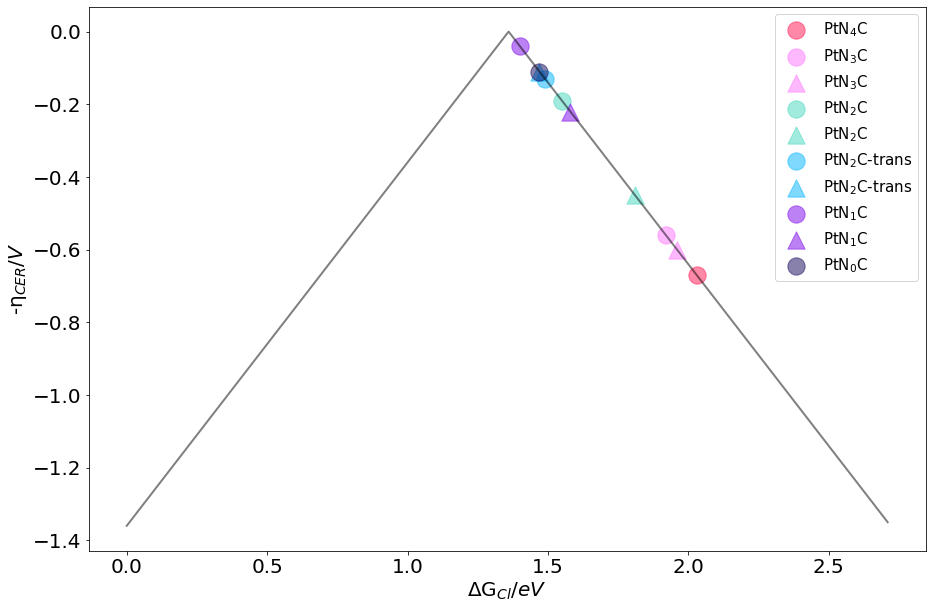

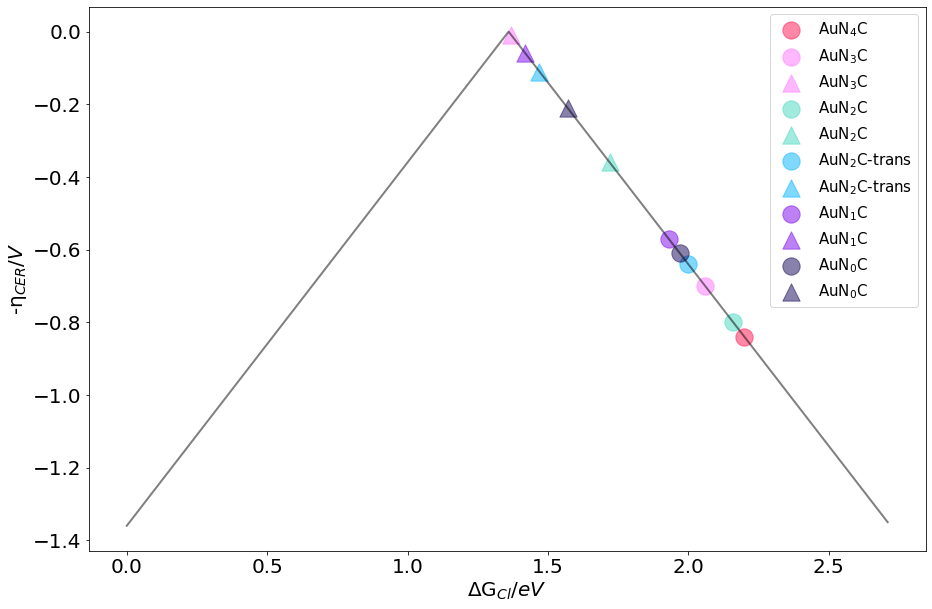

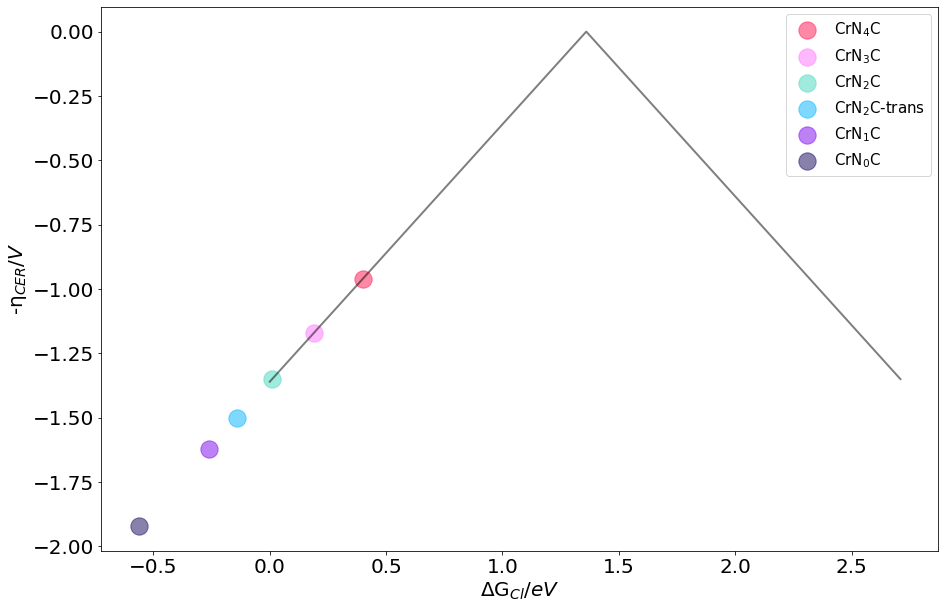

In [11]:
for i in list(df['M'][:12]) :
    volcano_all(i)

In [12]:
def volcano_lw(TM) :
    plt.figure(1,figsize=(15,10))
    ax = plt.subplot(111)

    x = []
    y = []

    x_fit = np.arange(0,1.36*2,0.01)
    y_fit1 = x_fit-1.36
    y_fit2 = 1.36-x_fit
    y_fit = np.maximum(y_fit1,y_fit2)
    ax.plot(x_fit,-y_fit,c='black',linewidth=2,alpha=0.5) 
    
    c = ['#ff124f','#fe75fe','#44D7BE','#00b3fe','#7a04eb','#120458']
    l = [TM+'N$_4$C',TM+'N$_3$C',TM+'N$_2$C',TM+'N$_2$C-trans',TM+'N$_1$C',TM+'N$_0$C']
    j = 0
    

    Gcl = list(df.loc[df['M']== TM, 'G_Cl'])
    η_CER = list(df.loc[df['M']== TM, 'η_CER'])
    site = list(df.loc[df['M']== TM, 'Cl_site'])
    
    j = 0
    for i in range(len(Gcl)) :
        if site[i] == 't' :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=300,label=l[i],marker='o',alpha=0.5)
            
        else :
            plt.scatter(Gcl[i],-η_CER[i],color=c[i],s=300,label=l[i],marker='^',alpha=0.5)
            
        if j < 5 :

            ann = ax.annotate("",
                              xy=(Gcl[j+1], -η_CER[j+1]), xycoords='data',
                              xytext=(Gcl[j], -η_CER[j]), textcoords='data',
                              size=40, va="center", ha="center",
                              arrowprops=dict(lw=2,arrowstyle="-|>",connectionstyle="arc3,rad=-1",fc="w")
                             )
            j = j+1
    
    
    ax.legend(fontsize=15)
        
    plt.xlabel('ΔG$_{Cl}$ / eV',fontsize=20)
    plt.ylabel('-η$_{CER}$ / V',fontsize=20)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.show()


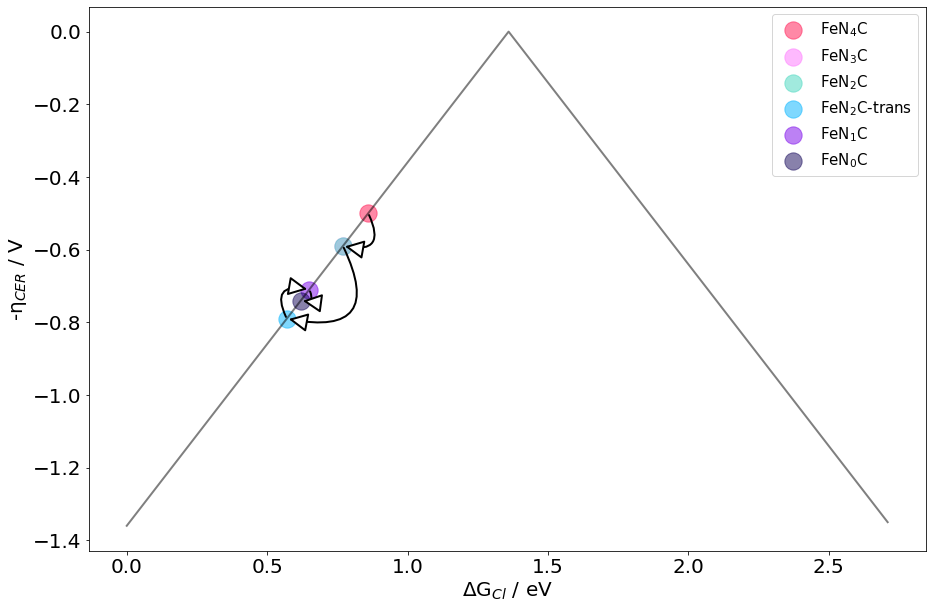

In [13]:
volcano_lw('Fe')

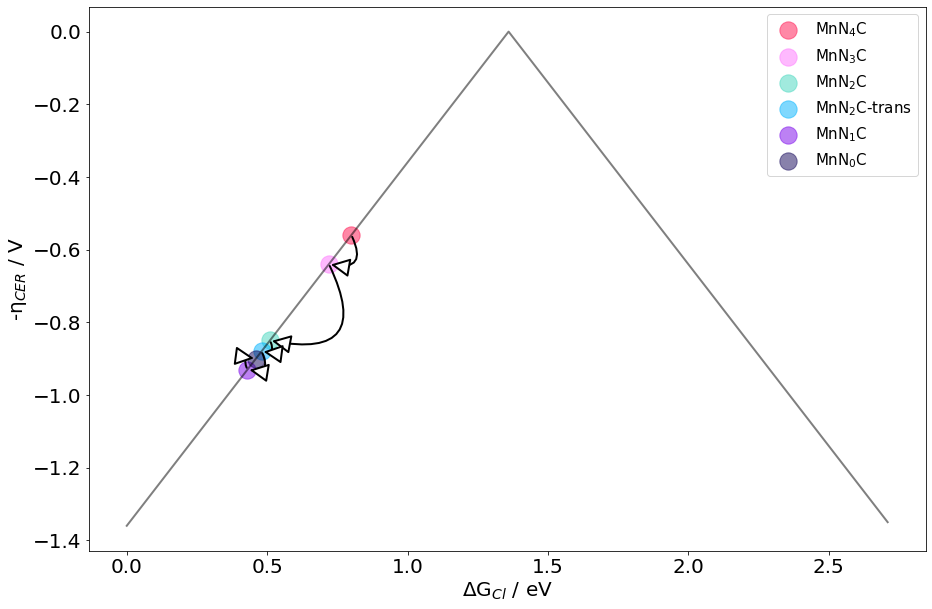

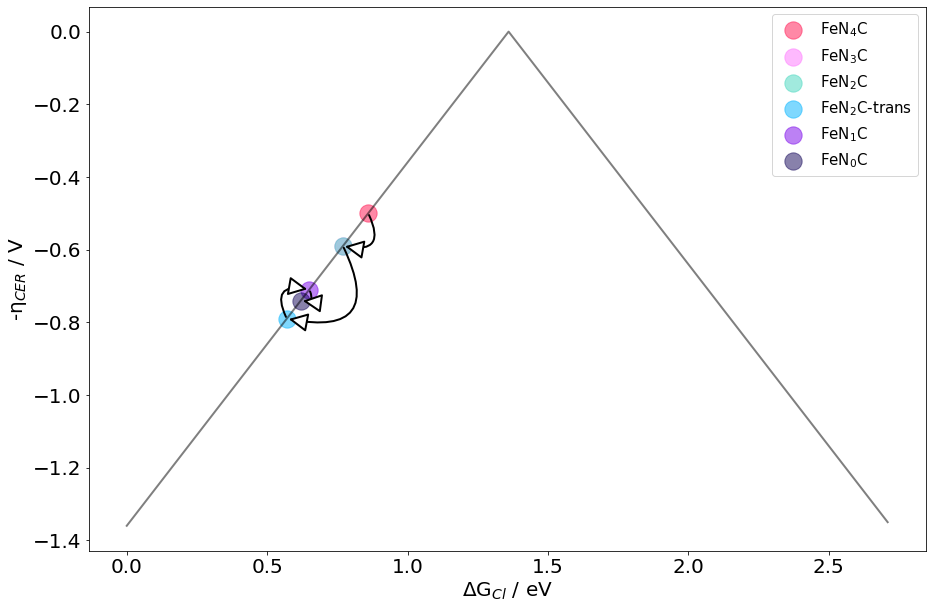

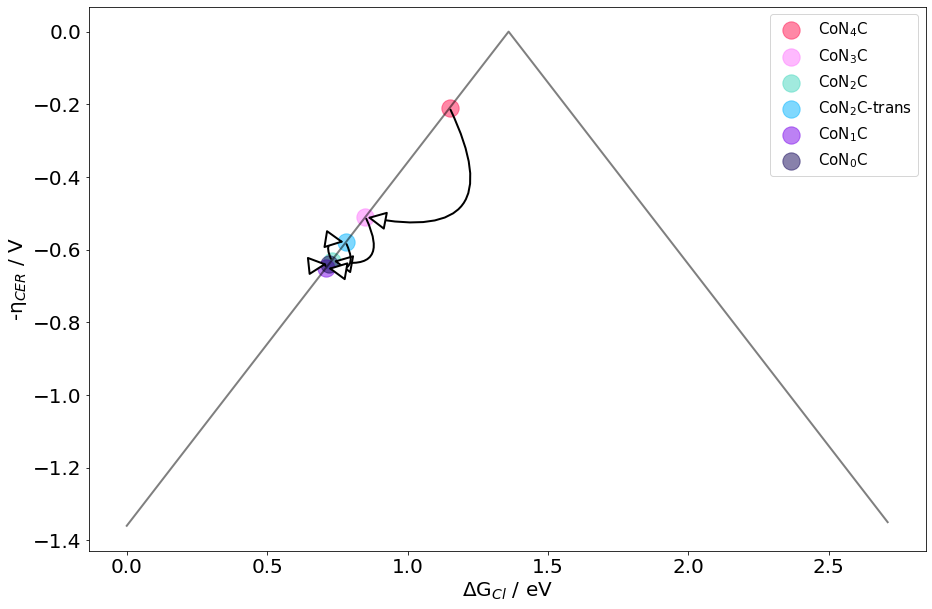

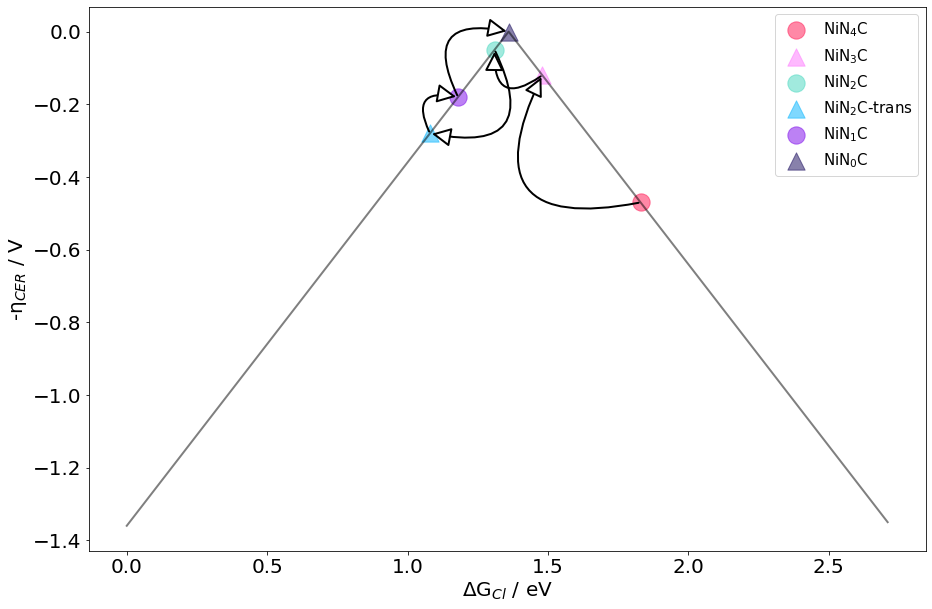

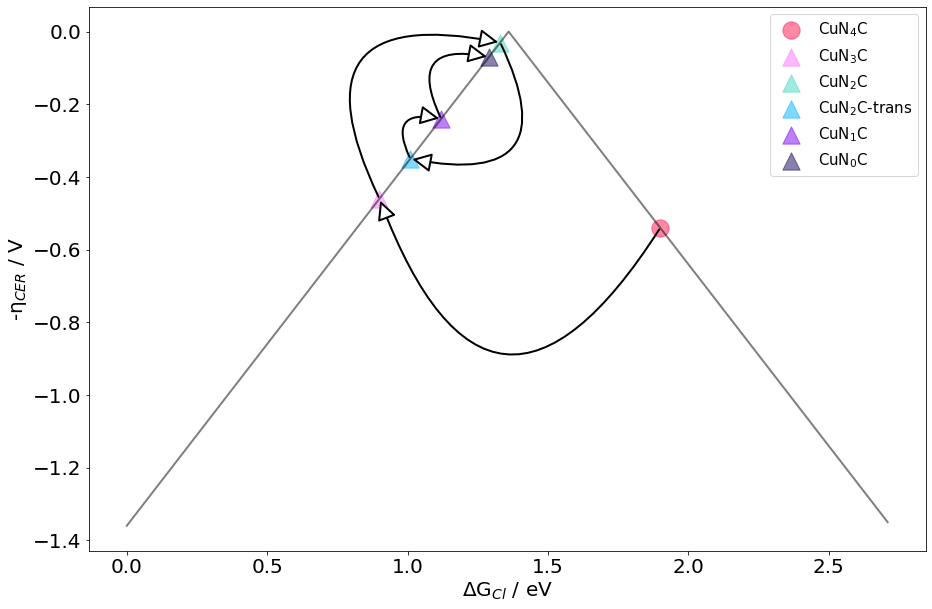

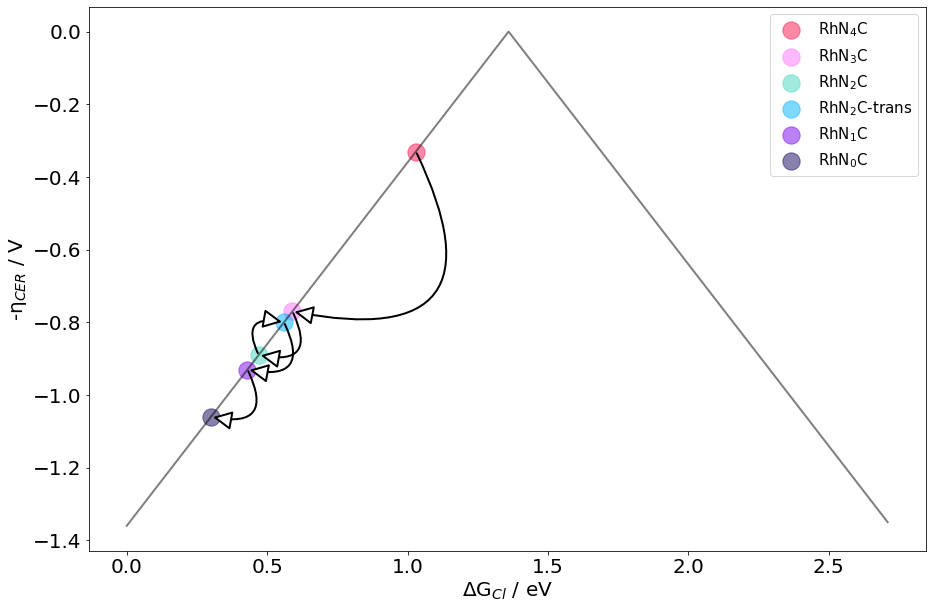

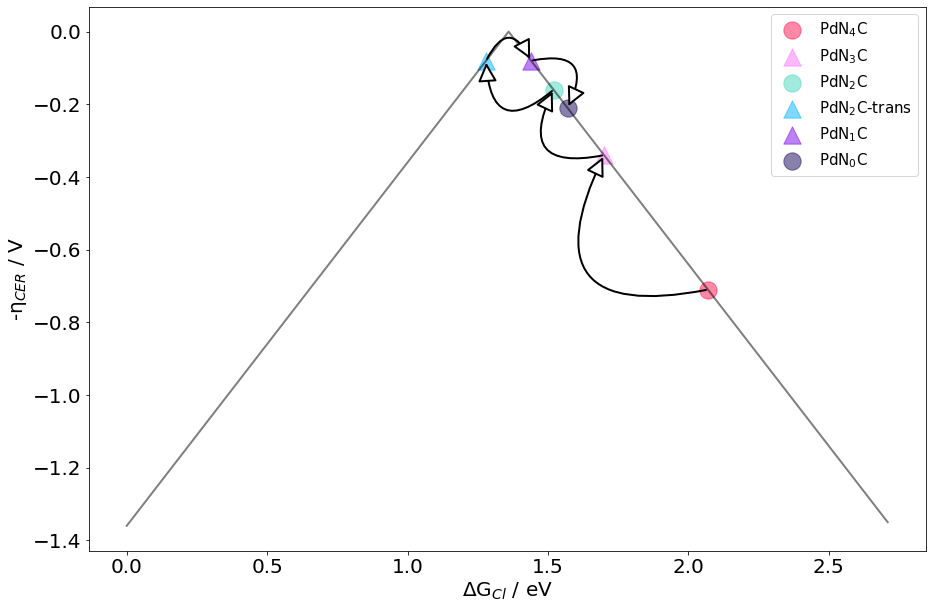

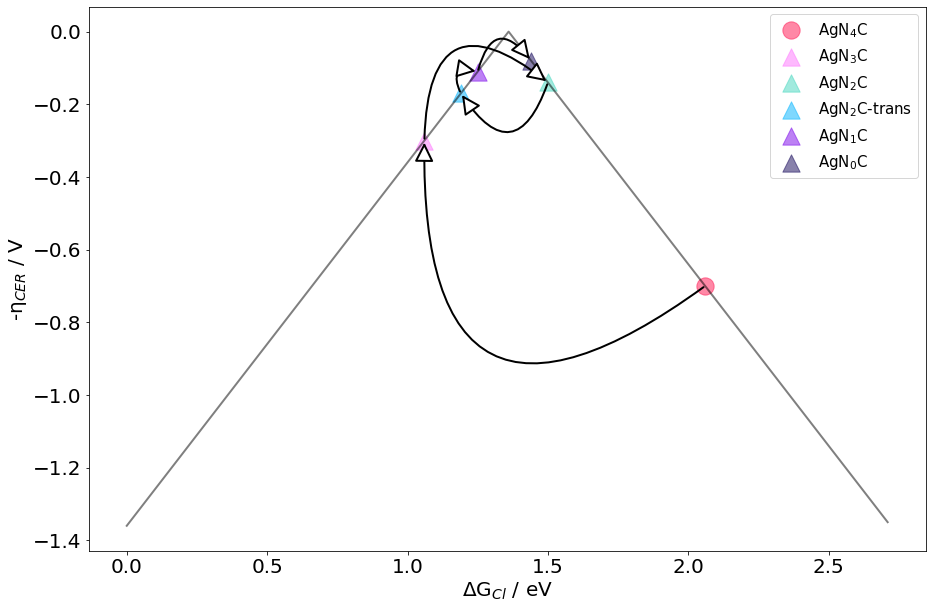

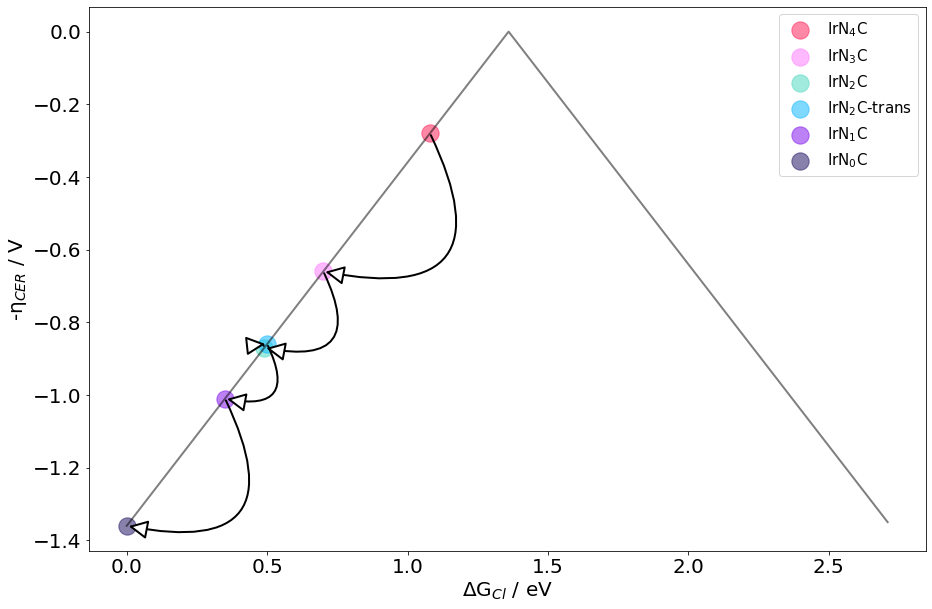

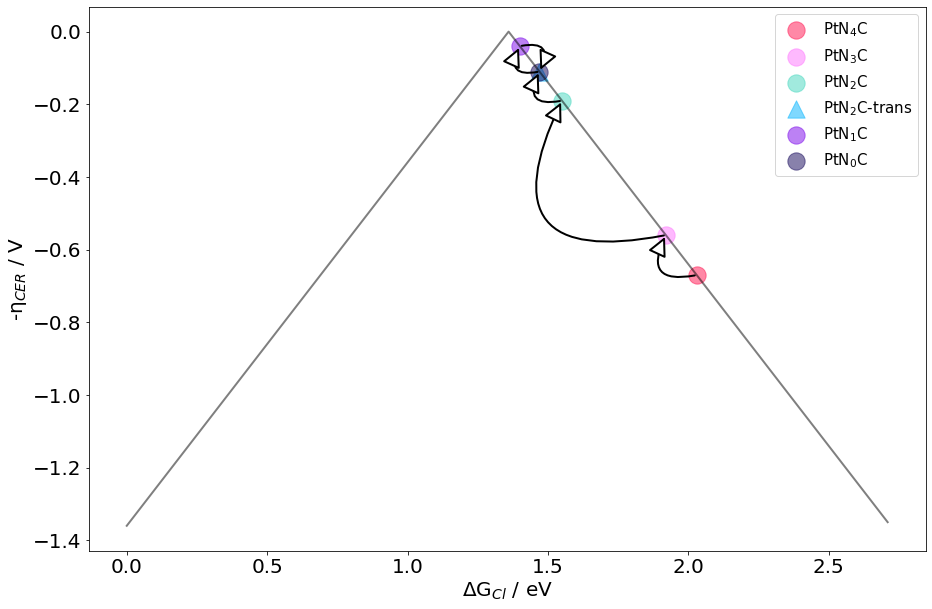

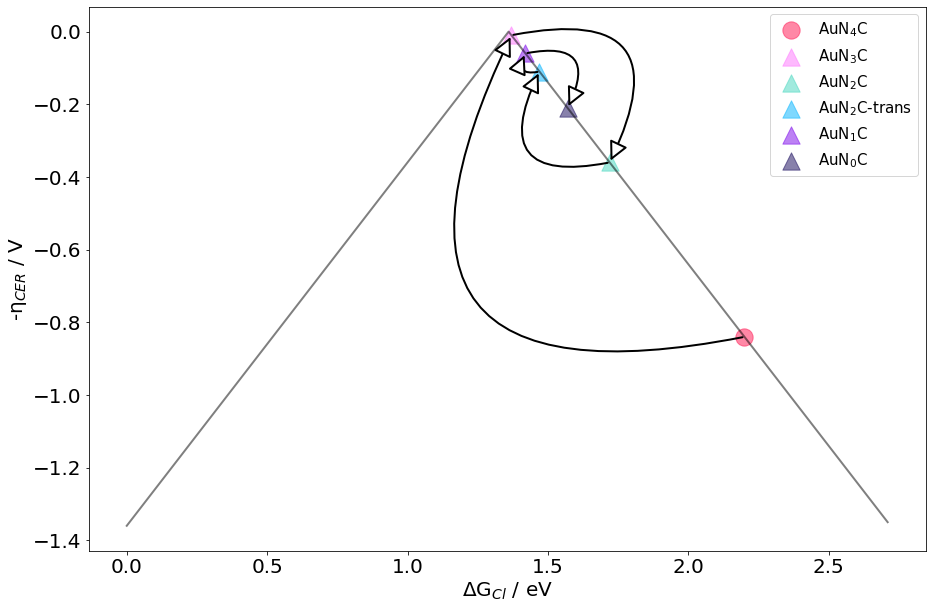

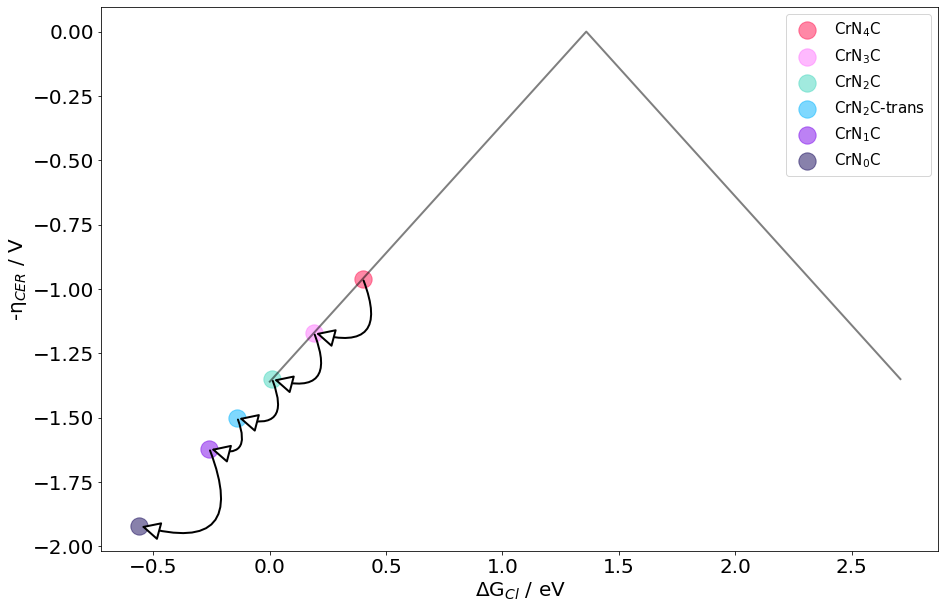

In [14]:
for i in list(df['M'][:12]) :
    volcano_lw(i)